# maxsmi
## Analysis of results

This notebook serves to analyse the results of the simulations ran on the Curta cluster from the Freie Universität Berlin.

_Note_:
- The notebook will run using the results stored in the `output` folder. They were generated using the following:
```
(maxsmi) $ python maxsmi/full_workflow.py --task ESOL --string-encoding smiles --aug-strategy-train augmentation_with_reduced_duplication --aug-strategy-test augmentation_with_reduced_duplication --aug-nb-train 70 --aug-nb-test 70 --ml-model CONV1D --eval-strategy True
```
- a `figures` folder will be created in which the images are saved.

📝 Have a look at the [README](https://github.com/volkamerlab/maxsmi/blob/main/README.md) page for more details.

## Ensemble learning results
Here we load the data which contains relevant information if there was augmentation on the test set, such as
- the absolute error between the true value and the average value
- confidence of the prediction: is the standard deviation low or high?

This data represents _only_ the test set (20%) and not the full data (100%).

### Goal
The aim of this notebook is to look at the best models, called the maxsmi models, and see how ensemble learning behaves.

In [1]:
import os
import pandas as pd
import numpy
from pathlib import Path
import matplotlib.pyplot as plt

from maxsmi.utils_analysis import load_results
from maxsmi.utils_smiles import get_num_heavy_atoms
from maxsmi.utils_optimal_model import retrieve_optimal_model

In [2]:
# Path to this notebook
HERE = Path(_dh[-1])

In [3]:
# Make a folder for output figures
os.makedirs(f"{HERE}/figures", exist_ok=True)

In [4]:
path_to_output = HERE.parents[0]

## Dataset
We consider the following datasets:

- ESOL
- lipophilicity
- FreeSolv

Comment/uncomment the dataset of choice in the cell below.

In [5]:
# TASK = "lipophilicity"
TASK = "ESOL"
# TASK = "FreeSolv"

## Maxsmi models
We retrieve the maxsmi models.

In [6]:
maxsmi_model = retrieve_optimal_model(TASK)
print(f"For the {TASK} data:\n"
      f"the maxsmi deep learning model is: {maxsmi_model[0]}\n"
      f"using an augmentation number of {maxsmi_model[2]} and\n"
      f"augmentation strategy: {maxsmi_model[1].__name__}")

For the ESOL data:
the maxsmi deep learning model is: CONV1D
using an augmentation number of 70 and
augmentation strategy: augmentation_with_reduced_duplication


## Load data for the maxsmi model on a specific task

In [7]:
maxsmi_data = load_results(path_to_output,
                           TASK,
                           maxsmi_model[1].__name__,
                           maxsmi_model[2],
                           maxsmi_model[1].__name__,
                           maxsmi_model[2],
                           maxsmi_model[0],
                           ensemble_learning=True)
maxsmi_data.head()

,target,canonical_smiles,augmented_smiles,new_smiles,average_prediction,std_prediction
181,-8.60,CCOc1ccc(C(C)(C)COCc2cccc(Oc3ccccc3)c2)cc1,"[c1cc(ccc1OCC)C(C)(COCc1cc(ccc1)Oc1ccccc1)C, C...","[c1cc(ccc1OCC)C(C)(COCc1cc(ccc1)Oc1ccccc1)C, C...",-6.570059,0.529988
277,-0.60,CCS,"[C(C)S, C(C)S, C(C)S, C(C)S, SCC, SCC, SCC, SC...","[C(C)S, C(C)S, C(C)S, C(C)S, SCC, SCC, SCC, SC...",-0.735204,0.098035
125,-0.60,CC(=O)OCC(COC(C)=O)OC(C)=O,"[C(C(OC(C)=O)COC(C)=O)OC(=O)C, C(C(COC(C)=O)OC...","[C(C(OC(C)=O)COC(C)=O)OC(=O)C, C(C(COC(C)=O)OC...",-0.901669,0.296972
937,-0.67,CCC(C)C(C)=O,"[C(CC)(C)C(C)=O, C(C(=O)C)(C)CC, C(C(=O)C)(C)C...","[C(CC)(C)C(C)=O, C(C(=O)C)(C)CC, C(C(=O)C)(C)C...",-0.805345,0.258695
444,-5.05,C=CCCCCCCC,"[C(CC=C)CCCCC, C(CC=C)CCCCC, C=CCCCCCCC, C=CCC...","[C(CC=C)CCCCC, C(CC=C)CCCCC, C=CCCCCCCC, C=CCC...",-4.922393,0.113186


## Load the maxsmi model but tested using the canonical SMILES

In [8]:
canonical_data = load_results(path_to_output,
                           TASK,
                           maxsmi_model[1].__name__,
                           maxsmi_model[2],
                           "no_augmentation",
                           0,
                           maxsmi_model[0],
                           ensemble_learning=True)
canonical_data.head()

,target,smiles,canonical_smiles,augmented_smiles,new_smiles,average_prediction,std_prediction
181,-8.60,CCOc1ccc(cc1)C(C)(C)COCc3cccc(Oc2ccccc2)c3,CCOc1ccc(C(C)(C)COCc2cccc(Oc3ccccc3)c2)cc1,[CCOc1ccc(C(C)(C)COCc2cccc(Oc3ccccc3)c2)cc1],[CCOc1ccc(C(C)(C)COCc2cccc(Oc3ccccc3)c2)cc1],-6.280674,0.0
277,-0.60,CCS,CCS,[CCS],[CCS],-0.755441,0.0
125,-0.60,CC(=O)OCC(COC(=O)C)OC(=O)C,CC(=O)OCC(COC(C)=O)OC(C)=O,[CC(=O)OCC(COC(C)=O)OC(C)=O],[CC(=O)OCC(COC(C)=O)OC(C)=O],-0.709001,0.0
937,-0.67,CCC(C)C(=O)C,CCC(C)C(C)=O,[CCC(C)C(C)=O],[CCC(C)C(C)=O],-0.907715,0.0
444,-5.05,CCCCCCCC=C,C=CCCCCCCC,[C=CCCCCCCC],[C=CCCCCCCC],-5.038906,0.0


Merge the tables into one dataframe.

In [9]:
canonical_data = canonical_data.rename(columns={"average_\
prediction": "canonical_prediction"})

In [10]:
data = pd.concat([maxsmi_data, canonical_data["canonical_prediction"]],
                 axis=1)
data.head()

,target,canonical_smiles,augmented_smiles,new_smiles,average_prediction,std_prediction,canonical_prediction
181,-8.60,CCOc1ccc(C(C)(C)COCc2cccc(Oc3ccccc3)c2)cc1,"[c1cc(ccc1OCC)C(C)(COCc1cc(ccc1)Oc1ccccc1)C, C...","[c1cc(ccc1OCC)C(C)(COCc1cc(ccc1)Oc1ccccc1)C, C...",-6.570059,0.529988,-6.280674
277,-0.60,CCS,"[C(C)S, C(C)S, C(C)S, C(C)S, SCC, SCC, SCC, SC...","[C(C)S, C(C)S, C(C)S, C(C)S, SCC, SCC, SCC, SC...",-0.735204,0.098035,-0.755441
125,-0.60,CC(=O)OCC(COC(C)=O)OC(C)=O,"[C(C(OC(C)=O)COC(C)=O)OC(=O)C, C(C(COC(C)=O)OC...","[C(C(OC(C)=O)COC(C)=O)OC(=O)C, C(C(COC(C)=O)OC...",-0.901669,0.296972,-0.709001
937,-0.67,CCC(C)C(C)=O,"[C(CC)(C)C(C)=O, C(C(=O)C)(C)CC, C(C(=O)C)(C)C...","[C(CC)(C)C(C)=O, C(C(=O)C)(C)CC, C(C(=O)C)(C)C...",-0.805345,0.258695,-0.907715
444,-5.05,C=CCCCCCCC,"[C(CC=C)CCCCC, C(CC=C)CCCCC, C=CCCCCCCC, C=CCC...","[C(CC=C)CCCCC, C(CC=C)CCCCC, C=CCCCCCCC, C=CCC...",-4.922393,0.113186,-5.038906


### Size of molecules
Compute the number of heavy atoms in each molecule.

In [11]:
data["num_heavy_atoms"] = data["canonical_\
smiles"].apply(get_num_heavy_atoms)

## Difference in prediction error with and without augmentation

In [12]:
data["average_error"] = (data["target"] - data["average_prediction"]).abs()
data["canonical_error"] = (data["target"] - data["canonical_prediction"]).abs()
data.head()

,target,canonical_smiles,augmented_smiles,new_smiles,average_prediction,std_prediction,canonical_prediction,num_heavy_atoms,average_error,canonical_error
181,-8.60,CCOc1ccc(C(C)(C)COCc2cccc(Oc3ccccc3)c2)cc1,"[c1cc(ccc1OCC)C(C)(COCc1cc(ccc1)Oc1ccccc1)C, C...","[c1cc(ccc1OCC)C(C)(COCc1cc(ccc1)Oc1ccccc1)C, C...",-6.570059,0.529988,-6.280674,28,2.029941,2.319326
277,-0.60,CCS,"[C(C)S, C(C)S, C(C)S, C(C)S, SCC, SCC, SCC, SC...","[C(C)S, C(C)S, C(C)S, C(C)S, SCC, SCC, SCC, SC...",-0.735204,0.098035,-0.755441,3,0.135204,0.155441
125,-0.60,CC(=O)OCC(COC(C)=O)OC(C)=O,"[C(C(OC(C)=O)COC(C)=O)OC(=O)C, C(C(COC(C)=O)OC...","[C(C(OC(C)=O)COC(C)=O)OC(=O)C, C(C(COC(C)=O)OC...",-0.901669,0.296972,-0.709001,15,0.301669,0.109001
937,-0.67,CCC(C)C(C)=O,"[C(CC)(C)C(C)=O, C(C(=O)C)(C)CC, C(C(=O)C)(C)C...","[C(CC)(C)C(C)=O, C(C(=O)C)(C)CC, C(C(=O)C)(C)C...",-0.805345,0.258695,-0.907715,7,0.135345,0.237715
444,-5.05,C=CCCCCCCC,"[C(CC=C)CCCCC, C(CC=C)CCCCC, C=CCCCCCCC, C=CCC...","[C(CC=C)CCCCC, C(CC=C)CCCCC, C=CCCCCCCC, C=CCC...",-4.922393,0.113186,-5.038906,9,0.127607,0.011094


In [13]:
def hist_maxsmi_vs_canonical_error(dataframe, task, save_fig=False):
    """
    Plots the histogram of the errors.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The dataframe of the results.
    task : str
        The task to consider
    save_fig : bool
        Whether to save the figure.

    Returns
    -------
    None
    """
    fig, ax = plt.subplots()
    plt.hist(dataframe['canonical_error'], alpha=0.5,
             bins=numpy.linspace(0, 3, 40))
    plt.hist(dataframe['average_error'], alpha=0.5,
             bins=numpy.linspace(0, 3, 40))
    ax.legend(["canonical", "ensemble learning"])
    ax.set_title(f"Histogram of the test errors\n"
                 f"on the {task} data using the Maxsmi model")
    ax.set_xlabel("Error between prediction and true value")
    ax.set_ylabel("Frequency")

    if save_fig:
        plt.savefig(f"figures/{task}_hist_maxsmi_vs_canonical_error.png",
                    dpi=1200,
                    facecolor='w',
                    edgecolor='w',
                    orientation='portrait',
                    format="png",
                    transparent=False,
                    bbox_inches=None,
                    pad_inches=20,)
    plt.show()

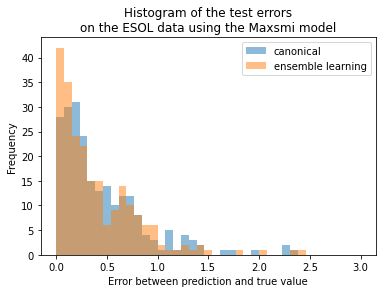

In [14]:
hist_maxsmi_vs_canonical_error(data, TASK, save_fig=True)